01 k-meansクラスタリング
======================

* `k-meansクラスタリング`は、最も広く用いられているクラスタリングアルゴリズム

    * このアルゴリズムは、データのある領域を代表するような**クラスタ重心**を見つけようとする
    
    * このアルゴリズムは次の2つのステップを繰り返す
    
        1. 個々のデータポイントを最寄りのクラスタ重心に割り当てる
        
        1. 個々のクラスタ重心をその点に割り当てられたデータポイントの平均設定する
        
        1. データポイントの割り当てが変化しなくなったら、アルゴリズムは終了する
       

* 以下の図では、合成データセットにこのアルゴリズムを適用した例

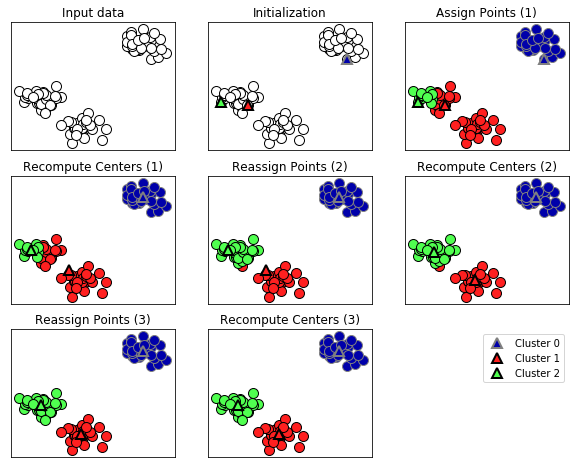

In [1]:
%matplotlib inline
import mglearn
mglearn.plots.plot_kmeans_algorithm()

* データポイントを丸、クラスタセンタを三角形で示している

    * 色はどのクラスタに属するかを示す
    
    * 3つのクラスタを探すように指定したので、アルゴリズムは3つのデータポイントをクラスタセンタとして乱数で選んでいる(「初期化」)
    
    * ここから、繰り返しが始まる

* まず、個々のデータポイントが最も近いクラスタセンタに割り当てられる(「点の割り当て(1)」)

* 次に、割り当てられた点の平均にクラスタセンタを更新する(「センタの再計算(1)」)

* これらの過程があと2回繰り返されている

* 3度目のループが終わると、クラスタセンタは動かなくなるので、アルゴリズムは停止する

* 新しいデータポイントが与えられると、`k-means`は、クラスタセンタのうち、最も近い物に割り当てる

* 以下の図に、先ほどの図で学習して得られたクラスタセンタの境界を示す

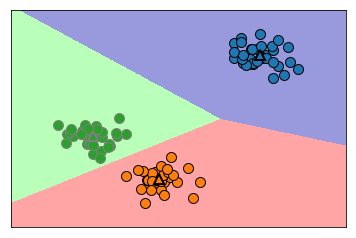

In [2]:
mglearn.plots.plot_kmeans_boundaries()

* scikit-learnの`k-means`を使うのはとても簡単である

    * 先ほどプロットした合成データを用いてみる
    
    * `KMeans`クラスのインスタンスを生成し、作りたいクラスタの数を設定する
    
    * 次に、データに対して`fit`メソッドを呼ぶ

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 合成2次元データを作る
X, y = make_blobs(random_state=1)

# クラスタリングモデルを作る
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

* アルゴリズムの実行過程で、`X`に格納された個々の訓練データポイントに対して、クラスタラベルが割り当てられる

* 割り当てられたラベルは、`kmeans.labels_`属性で確認できる

In [4]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


* 3つのクラスタを作るように指定したので、クラスタラベルは0から2になる

* `predict`メソッドを用いて、新しいデータポイントにクラスタを割り当てることができる

    * 新しいデータポイントは、最も近いクラスタセンタに割り当てられるが、既存のモデルは変更されない
    
    * `predict`メソッドを訓練セットに対して実行すると、`labels_`と同じ結果が得られる

In [5]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


* クラスタリングとクラス分類は、両方ともラベル付けをするという意味で、ある意味似ている

    * しかし、クラスタリングには真のラベルというものがないので、付いたラベルには**先験的**な意味はない
    
    * 顔画像の例)アルゴリズムが見つけたクラスタ3には、ベラという友達の写真しか無かったとする
    
    * しかし、その画像を見るまではベラだということはわからないし、さらに3という番号もたまたまその場合にそうだったにすぎない
    
    * アルゴリズムからわかることは、3というラベルの付いた顔画像が相互に似ていること

* 上で計算した2次元のトイデータセットにしても、あるグループがラベル0になっていて、もう一方が1になっていることには特に意味はない

    * 乱数で初期化してるので、もう一度アルゴリズムを実行すると、別の番号が付くかも知れない

* このデータをもう一度プロットしてみる

    * クラスタセンタは`cluster_centers_`属性に格納されているので、これを三角形でプロットする

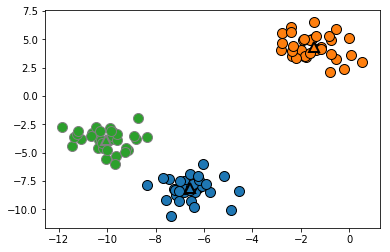

In [6]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0],
                         kmeans.cluster_centers_[:, 1],
                         [0, 1, 2],
                         markers='^',
                         markeredgewidth=2)


* クラスタセンタの数を減らすこともできる

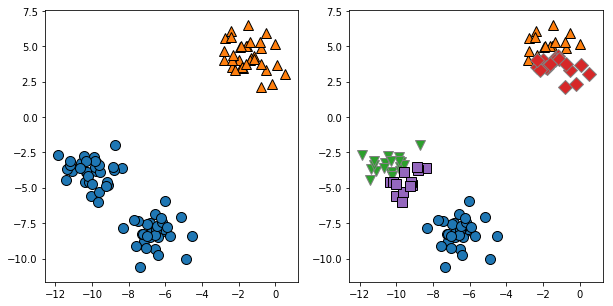

In [8]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# クラスタセンタを2つに指定
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])


# クラスタセンタを5つに指定
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

## 1. k-meansがうまくいかない場合

* あるデータセットに対して「正しい」クラスタの数がわかっていたとしても、`k-means`がそれをうまく見つけられるとは限らない

* それぞれのクラスタは、重心だけで定義されている

    * これは、クラスタが凸の形状になることを意味する
    
    * この結果、`k-means`では比較的単純な形しか見つけられない
    
    * また、`k-means`では、クラスタ境界をクラスタセンタのちょうど中間に引く
    
    * このため、場合によっては驚くような結果になることがある

Text(0, 0.5, 'Feature 1')

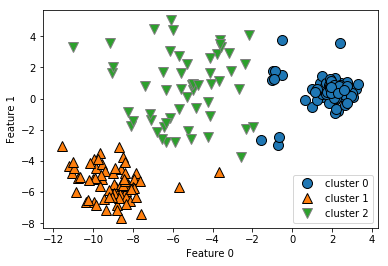

In [9]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

* 普通に考えると、左下の密な領域が1つのクラスタに、右上の密な領域がもう1つのクラスタに、中央にあまり密ではない領域がもう1つのクラスタになる

    * しかし、この結果では、クラスタ0とクラスタ1に、真ん中の方向に他のデータポイントとはかけ離れた位置にあるデータポイントもふくまれてしまう
    
* また、`k-means`はクラスタに関して全ての方向が同じように重要であることを仮定する

    * 以下の図に、明らかに3つに分離できるデータポイントを持つ2次元データセットを示す
    
    * これらのグループは対角線方向に伸ばされている
    
    * `k-means`は最も近いクラスタセンタへの距離しか考慮しないので、このようなデータを取り扱うことはできない

Text(0, 0.5, 'Feature 1')

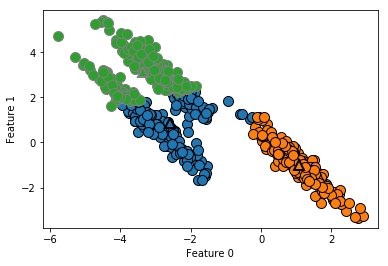

In [11]:
import numpy as np
# ランダムにクラスタデータを作成
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 対角線方向に引き伸ばす
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# データポイントを3つにクラスタリング
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# クラスタ割り当てとクラスタセンタをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

* `k-means`は、クラスタが複雑な形の場合にもうまく機能しない

* two_moonsデータセットの例を見てみる

Text(0, 0.5, 'Feature 1')

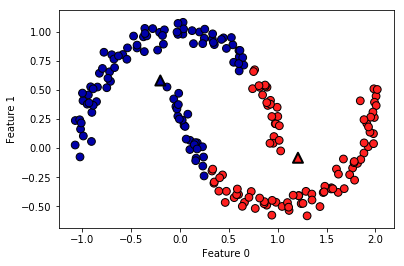

In [12]:
# 合成データセットtwo_moonsデータ作成(今度はノイズ少なめ)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 2つのクラスタにクラスタ分類
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# クラスタ割り当てとクラスタセンタをプロット
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

* クラスタリングアルゴリズムが、2つの半月型を見つけることを期待したが、`k-means`では見つけられない

## 2. ベクトル量子化、もしくは成分分解としてのk-means

* `k-means`はクラスタリングアルゴリズムだが、`k-means`と`PCA`や`NMF`などの成分分解手法の間には興味深い類似性がある

    * `PCA`は、データ中の最も分散が大きい方向群を見出そうとし、`NMF`は足しこんでいくことのできる成分を見つけようとした
    
    * これらは、データの「極端な特徴」と「部品」に相当する
    
    * これらの手法は、データポイントを複数の成分の和として表現しようとする
    
* これに対して、`k-means`はクラスタセンタで個々のデータポイントを表現する

    * 個々のデータポイントを、クラスタセンタとして与えられる単一の成分で表現していると考えることができる
    
    * このように、`k-means`を単一成分で個々のデータポイントを表現する成分分解手法として見る考え方を、**ベクトル量子化**という

* `PCA`、`NMF`と`k-means`を、抽出された成分で比較してみる

    * さらに、100成分を用いた再構成画像の方も比較する
    
    * `k-means`の再構成画像には、訓練セットから得られたクラスタセンタのうち最も近いものを用いている

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

image_shape = people.images[0].shape
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

* `k-means`を用いたベクトル量子化の興味深い点は、入力次元の数よりもはるかに多くのクラスタを使うことができること

* two_moonsデータセットに戻ってみる

    * `PCA`や`NMF`では、このデータセットに対してできることはほとんどない(このデータセットには2つしか次元がないため)
    
    * `PCA`や`NMF`を使って次元を減らし、1次元にしてしまうとデータの構造が完全に破壊されてしまう
    
    * しかし、多数のクラスタセンタで`k-means`を用いれば、もっと強力な表現を見つけることができる

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


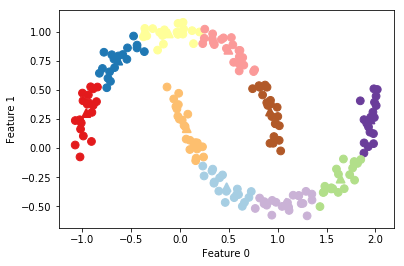

In [13]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

* ここでは10のクラスタセンタを用いている

    * 従って、個々のデータポイントには0-9の番号が割り当てられている
    
    * これを、10成分でのデータ表現であると考えることができる
    
    * 割り当てられたクラスタセンタに相当する特徴量だけが1で、それ以外の特徴量は0とするデータ表現
    
    * こう考えると、10個の新しい特徴量ができたことになる
    
* この10次元表現を使えば、この2つの半月型を線形モデルで分離できる
    
    * これは、元の2次元特徴量ではできなかったこと
    
    * さらに、個々のクラスタセンタからの距離を特徴量として用いれば、さらに強力な表現となる
    
    * これには、`kmeans`の`transform`を用いる

In [14]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


* `k-means`は、非常に広く用いられているクラスタリングアルゴリズムである

    * これは、比較的理解しやすく実装しやすいからだけでなく、比較的高速に実行できるからでもある
    
    * `k-means`は大規模なデータセットにも適用できるし、scikit-learnにはさらに非常に大規模なデータセットを処理できる`MiniBatchKMeans`もある

* `k-means`の欠点の一つは、初期化が乱数で行われることである

    * これは、アルゴリズムの出力が乱数のシードに依存することを意味する
    
    * scikit-learnではデフォルトで、異なる乱数を用いて10回実行し、最良の結果を返してくる
    
* さらに欠点があるとすれば、

    * `k-means`がクラスタの形に対してかなり制約の強い仮定を置いていること
    
    * 探しているクラスタの数をユーザが指定しなければならないこと
    
* クラスタの数は、実世界のアプリケーションではわからないことが多い

| 版 | 年/月/日 |
|----|----------|
|初版|2019/03/17|